In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
#Read the Data

In [3]:
df=pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")

In [4]:
#Exploring the Data

In [5]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [6]:
df.columns.tolist()

['Customer ID',
 'Gender',
 'Age',
 'City',
 'Membership Type',
 'Total Spend',
 'Items Purchased',
 'Average Rating',
 'Discount Applied',
 'Days Since Last Purchase',
 'Satisfaction Level']

In [7]:
df.shape

(350, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [9]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [10]:
df.duplicated().sum()

0

In [11]:
df[df.duplicated(subset=df.columns.difference(['Customer ID']), keep=False)]

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
4,105,Male,27,Miami,Silver,720.4,13,4.0,True,55,Unsatisfied
6,107,Female,31,New York,Gold,1150.6,15,4.5,True,28,Satisfied
21,122,Male,30,San Francisco,Gold,1470.5,20,4.8,False,13,Satisfied
22,123,Male,27,Miami,Silver,710.4,13,4.1,True,54,Unsatisfied
23,124,Female,37,Houston,Bronze,430.8,7,3.4,False,23,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
296,397,Male,28,San Francisco,Gold,1480.1,21,4.9,False,12,Satisfied
298,399,Female,36,Houston,Bronze,470.5,8,3.0,False,22,Neutral
308,409,Male,28,San Francisco,Gold,1490.1,21,4.9,False,11,Satisfied
320,421,Male,28,San Francisco,Gold,1480.1,21,4.9,False,12,Satisfied


In [12]:
df.shape

(350, 11)

In [13]:
df.isna().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [14]:
#there are null values
df.head(5)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [15]:
df[df["Satisfaction Level"].isnull()]

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,172,Female,37,Houston,Bronze,420.8,7,3.1,False,21,NaN
143,244,Female,37,Houston,Bronze,430.8,7,3.4,False,23,NaN


In [16]:
#Data Cleaning

In [17]:
df.rename(columns={"Total Spend": "Total_Expenditure" , "Days Since Last Purchase": "Days_Since_Last_Purchase"}, inplace=True)

In [18]:
df.head(2)

,Customer ID,Gender,Age,City,Membership Type,Total_Expenditure,Items Purchased,Average Rating,Discount Applied,Days_Since_Last_Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.5,11,4.1,False,18,Neutral


In [19]:
##Analysis and Visulation

In [20]:
#Univariate Analysis

In [21]:
#Gender
gender_counts = df.Gender.value_counts()
gender_counts

Gender
Female    175
Male      175
Name: count, dtype: int64

In [22]:
fig = px.pie(values=gender_counts.values, names=gender_counts.index, 
             title='Gender Distribution', hole=0.4)
fig.show()

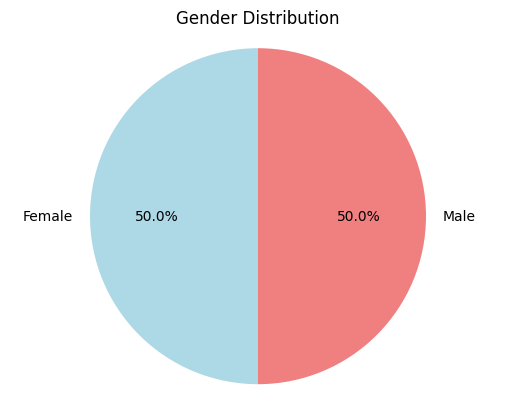

In [23]:
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

In [24]:
#Age
df.Age.min()


26

In [25]:
df.Age.max()

43

In [26]:
df.Age.mean()

33.597142857142856

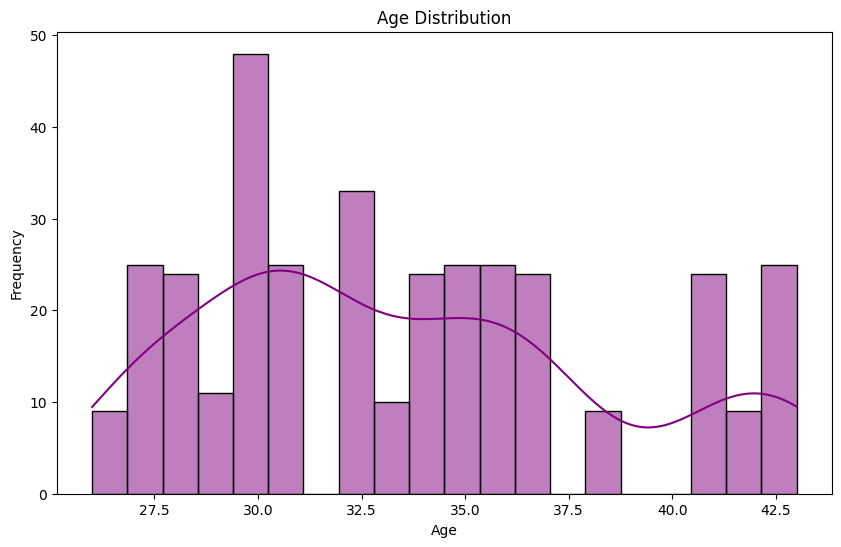

In [27]:
plt.figure(figsize=(10, 6))

# Plot the histogram and KDE for 'Age'
sns.histplot(df['Age'], kde=True, bins=20, color='purple')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Show the plot
plt.show()

In [28]:
fig = px.histogram(df, x='Age', nbins=30, title='Age Distribution', 
                   color_discrete_sequence=['blue'])

# Show the interactive plot
fig.show()

In [29]:
fig = px.box(df, y='Age', title='Age Box Plot', points='outliers', color_discrete_sequence=['purple'])

fig.show()

In [30]:
#City
city_counts =df.City.value_counts()
city_counts

City
New York         59
Los Angeles      59
Chicago          58
San Francisco    58
Miami            58
Houston          58
Name: count, dtype: int64

In [31]:
fig = px.pie(values=city_counts.values, names=city_counts.index, 
             title='City Distribution', hole=0.4)
fig.show()

In [32]:
#Membership Type

member_counts=df["Membership Type"].value_counts()
member_counts

Membership Type
Gold      117
Silver    117
Bronze    116
Name: count, dtype: int64

In [33]:
fig = px.pie(df["Membership Type"].value_counts().reset_index(), names='Membership Type', values='count', title='Membership Type Distribution')
fig.show()

In [34]:
df.head(1)

,Customer ID,Gender,Age,City,Membership Type,Total_Expenditure,Items Purchased,Average Rating,Discount Applied,Days_Since_Last_Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,Satisfied


In [35]:
df["Total_Expenditure"].min()

410.8

In [36]:
df["Total_Expenditure"].max()

1520.1

In [37]:
df["Total_Expenditure"].mean()

845.3817142857142

In [38]:
fig = px.histogram(df, x='Total_Expenditure', nbins=20, title='Total Expenditure Distribution', 
                   color_discrete_sequence=['green'])

fig.show()

In [39]:
fig = px.box(df, y='Total_Expenditure', title='Total Expenditure Box Plot', points='outliers', color_discrete_sequence=['blue'])

fig.show()

In [40]:
#Items Purchased
df["Items Purchased"].value_counts().reset_index()

,Items Purchased,count
0,10,47
1,9,34
2,8,33
3,12,33
4,13,32
5,11,28
6,7,25
7,15,24
8,21,24
9,16,24


In [41]:
items_counts = df["Items Purchased"].value_counts().reset_index()
items_counts

,Items Purchased,count
0,10,47
1,9,34
2,8,33
3,12,33
4,13,32
5,11,28
6,7,25
7,15,24
8,21,24
9,16,24


In [42]:
# Ensure 'Items Purchased' is treated as a categorical variable to put all values in x axis
items_counts['Items Purchased'] = items_counts['Items Purchased'].astype(str)
fig = px.bar(items_counts, x='Items Purchased', y='count', 
             title='Distribution of Items Purchased', 
             color='count', color_continuous_scale='Viridis')
fig.show()

In [43]:
fig = px.histogram(df, x='Items Purchased', nbins=20, title='Items Purchased Distribution', 
                   color_discrete_sequence=['#799351'])

fig.show()

In [44]:
df["Average Rating"].min()

3.0

In [45]:
df["Average Rating"].max()

4.9

In [46]:
df["Average Rating"].mean()

4.019142857142858

In [47]:
fig = px.histogram(df, x='Average Rating', nbins=20, title='Average Rating Distribution', 
                   color_discrete_sequence=['#8C3061'])

fig.show()




In [48]:
df["Average Rating"].value_counts()

Average Rating
4.1    34
4.5    31
3.3    25
3.8    24
4.9    24
3.6    24
4.7    22
4.8    21
4.3    20
3.4    19
4.0    18
3.1    17
4.2    12
3.0    12
4.6    11
3.2    10
3.5     9
4.4     8
3.9     8
3.7     1
Name: count, dtype: int64

In [49]:
#Discount Applied
discount_counts=df["Discount Applied"].value_counts()
discount_counts

Discount Applied
True     175
False    175
Name: count, dtype: int64

In [50]:
fig = px.pie(values=discount_counts.values, names=discount_counts.index, 
             title='Discount Applied Distribution', hole=0.4)
fig.show()

In [51]:
df.Days_Since_Last_Purchase.min()

9

In [52]:
df.Days_Since_Last_Purchase.max()

63

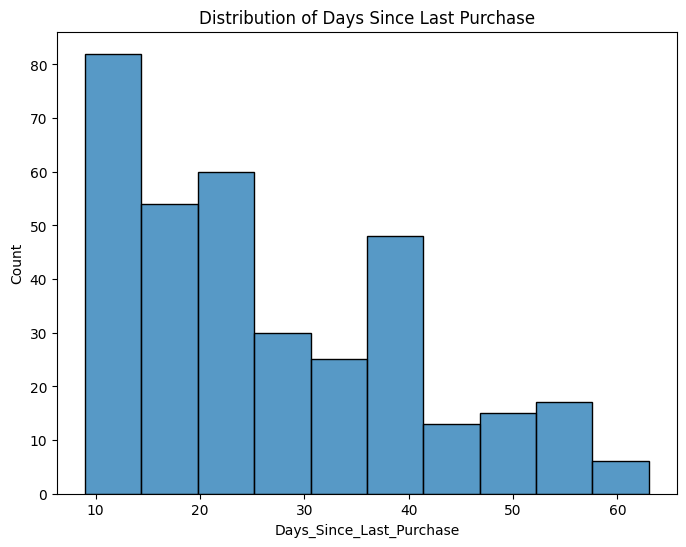

In [53]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Days_Since_Last_Purchase'])
plt.title("Distribution of Days Since Last Purchase")
plt.show()

In [54]:
#Multivariate analysis

In [55]:
df.head(1)

,Customer ID,Gender,Age,City,Membership Type,Total_Expenditure,Items Purchased,Average Rating,Discount Applied,Days_Since_Last_Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,Satisfied


In [56]:
df.groupby("Gender").Age.mean()

Gender
Female    36.434286
Male      30.760000
Name: Age, dtype: float64

In [57]:
df.groupby("Gender").Age.max()

Gender
Female    43
Male      36
Name: Age, dtype: int64

In [58]:
df.groupby(["City","Gender"]).Age.mean()

City           Gender
Chicago        Female    42.017241
Houston        Female    36.706897
Los Angeles    Male      34.118644
Miami          Female    29.000000
               Male      28.947368
New York       Female    30.706897
               Male      31.000000
San Francisco  Male      29.120690
Name: Age, dtype: float64

In [59]:
crosstab_age =pd.crosstab(df.Gender , df.City, values= df.Age, aggfunc= np.average)
crosstab_age 

City,Chicago,Houston,Los Angeles,Miami,New York,San Francisco
Gender,,,,,,
Female,42.017241,36.706897,NaN,29.000000,30.706897,NaN
Male,NaN,NaN,34.118644,28.947368,31.000000,29.12069


In [60]:
crosstab_age_long = crosstab_age.reset_index().melt(id_vars='Gender', var_name='City', value_name='Average Age')

fig = px.imshow(crosstab_age, text_auto=True, color_continuous_scale='viridis', 
                labels={'x': 'City', 'y': 'Gender', 'color': 'Average Age'},
                title='Average Age by Gender and City')

fig.show()

In [61]:
pd.crosstab(df.Gender, df.City, values=df.City, aggfunc=np.size)

City,Chicago,Houston,Los Angeles,Miami,New York,San Francisco
Gender,,,,,,
Female,58.0,58.0,NaN,1.0,58.0,NaN
Male,NaN,NaN,59.0,57.0,1.0,58.0


In [62]:
crosstab_counts = pd.crosstab(df.Gender, df.City)

fig = px.imshow(crosstab_counts, text_auto=True, color_continuous_scale='Blues',
                labels={'x': 'City', 'y': 'Gender', 'color': 'Count'},
                title='Counts of Gender by City')
fig.show()

In [63]:
##Predictive Modeling

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [65]:
#Create the Data frame
data = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")


In [66]:
#Drop rows with missing values
data = data.dropna()

In [67]:
#Prepare features and targets
#Encode Categorical variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['City'] = le.fit_transform(data['City'])
data['Membership_Type'] = le.fit_transform(data['Membership Type'])
data['Satisfaction_Level'] = le.fit_transform(data['Satisfaction Level'])


In [68]:
# Select features for the model
features = ['Gender', 'Age', 'City', 'Membership_Type', 'Total Spend', 
           'Items Purchased', 'Average Rating', 'Discount Applied', 
           'Days Since Last Purchase']


In [69]:
# Convert boolean to integer
data['Discount Applied'] = data['Discount Applied'].astype(int)

X = data[features]
y = data['Satisfaction_Level']


In [70]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [72]:
# Make predictions
y_pred = rf_model.predict(X_test)


In [73]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, 
                          target_names=['Neutral', 'Satisfied', 'Unsatisfied']))

Classification Report:
              precision    recall  f1-score   support

     Neutral       1.00      0.96      0.98        25
   Satisfied       0.96      1.00      0.98        26
 Unsatisfied       1.00      1.00      1.00        19

    accuracy                           0.99        70
   macro avg       0.99      0.99      0.99        70
weighted avg       0.99      0.99      0.99        70



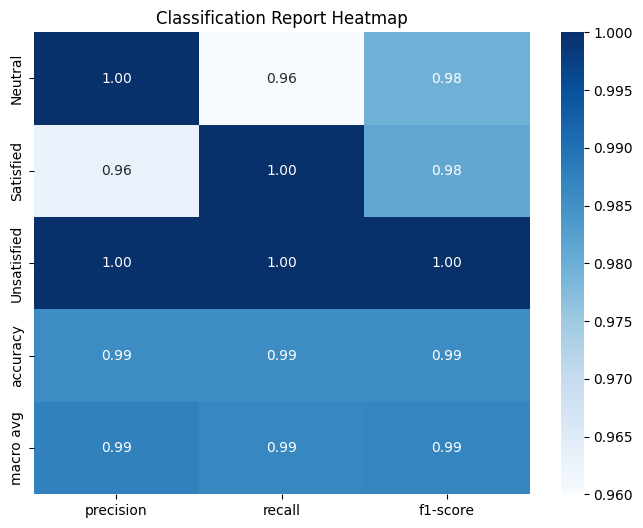

In [78]:

# Generate classification report as a dictionary
report = classification_report(y_test, y_pred, target_names=['Neutral', 'Satisfied', 'Unsatisfied'], output_dict=True)

# Convert report to DataFrame for easier plotting
report_df = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()


In [74]:
# Calculate feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                    feature  importance
4               Total Spend    0.247695
8  Days Since Last Purchase    0.211593
7          Discount Applied    0.147010
2                      City    0.136439
5           Items Purchased    0.131974
6            Average Rating    0.071391
1                       Age    0.051336
3           Membership_Type    0.001976
0                    Gender    0.000587


In [75]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[24  1  0]
 [ 0 26  0]
 [ 0  0 19]]


In [76]:
# Calculate model accuracy on test set
accuracy = rf_model.score(X_test, y_test)
print(f"\nModel Accuracy: {accuracy:.3f}")


Model Accuracy: 0.986


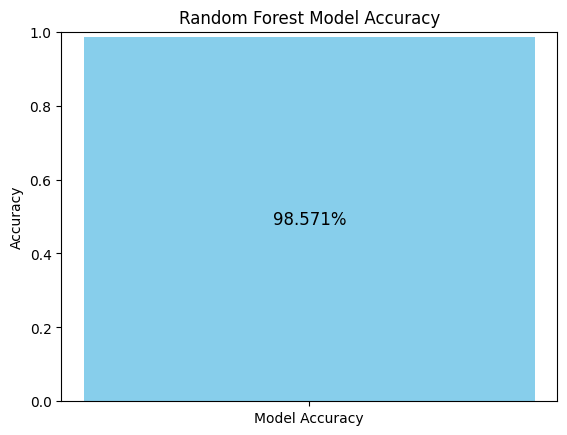

In [77]:
import matplotlib.pyplot as plt

# Assuming accuracy is a variable containing the accuracy score
accuracy = rf_model.score(X_test, y_test)

# Plotting
fig, ax = plt.subplots()
ax.bar(['Model Accuracy'], [accuracy], color='skyblue')
ax.set_ylim(0, 1)  # Accuracy is between 0 and 1
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Model Accuracy')
plt.text(0, accuracy / 2, f'{accuracy:.3%}', ha='center', va='center', fontsize=12, color='black')
plt.show()
